In [429]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [430]:
df = pd.read_csv('loan_2019_20.csv')
df.head()

/var/folders/25/qdj6v0q16nj947n0zplvjg5r0000gp/T/ipykernel_10645/2045478829.py:1: DtypeWarning: Columns (137) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_2019_20.csv')


,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,149203043,24000.0,24000.0,24000.0,60 months,13.90%,557.20,C,C1,...,Apr-2020,Jun-2020,Apr-2020,2.0,0.0,ACTIVE,473.24,20656.42,557.2,N
1,1,149354242,18500.0,18500.0,18500.0,60 months,14.74%,437.60,C,C2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,149355875,24000.0,24000.0,24000.0,36 months,8.19%,754.18,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,3,149437986,2800.0,2800.0,2775.0,36 months,8.19%,87.99,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,4,149511512,8800.0,8800.0,8800.0,36 months,20.00%,327.04,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


# 1. Data cleaning

### 1.1. Delete all unnecessary columns

In [431]:
columns_to_drop = [
    'loan_amnt',
    'funded_amnt_inv',
    'installment',
    'sub_grade',
    'verification_status',
    'issue_d',
    'pymnt_plan',
    'url',
    'title',
    'zip_code',
    'earliest_cr_line',
    'fico_range_low',
    'fico_range_high',
    'inq_last_6mths',
    'mths_since_last_delinq',
    'mths_since_last_record',
    'revol_util',
    'initial_list_status',
    'out_prncp',
    'out_prncp_inv',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee',
    'recoveries',
    'collection_recovery_fee',
    'last_pymnt_d',
    'last_pymnt_amnt',
    'next_pymnt_d',
    'last_credit_pull_d',
    'last_fico_range_high',
    'collections_12_mths_ex_med',
    'mths_since_last_major_derog',
    'policy_code',
    'annual_inc_joint',
    'dti_joint',
    'verification_status_joint',
    'acc_now_delinq',
    'tot_coll_amt',
    'open_acc_6m',
    'open_act_il',
    'open_il_12m',
    'open_il_24m',
    'mths_since_rcnt_il',
    'total_bal_il',
    'il_util',
    'open_rv_12m',
    'open_rv_24m',
    'max_bal_bc',
    'all_util',
    'total_rev_hi_lim',
    'inq_fi',
    'total_cu_tl',
    'inq_last_12m',
    'acc_open_past_24mths',
    'avg_cur_bal',
    'bc_open_to_buy',
    'bc_util',
    'chargeoff_within_12_mths',
    'delinq_amnt',
    'mo_sin_old_il_acct',
    'mo_sin_old_rev_tl_op',
    'mo_sin_rcnt_rev_tl_op',
    'mo_sin_rcnt_tl',
    'mths_since_recent_bc',
    'mths_since_recent_bc_dlq',
    'mths_since_recent_inq',
    'mths_since_recent_revol_delinq',
    'num_accts_ever_120_pd',
    'num_actv_rev_tl',
    'num_op_rev_tl',
    'num_rev_accts',
    'num_rev_tl_bal_gt_0',
    'num_sats',
    'num_tl_120dpd_2m',
    'num_tl_30dpd',
    'num_tl_90g_dpd_24m',
    'num_tl_op_past_12m',
    'tax_liens',
    'tot_hi_cred_lim',
    'total_bal_ex_mort',
    'total_bc_limit',
    'revol_bal_joint',
    'sec_app_fico_range_low',
    'sec_app_fico_range_high',
    'sec_app_earliest_cr_line',
    'sec_app_inq_last_6mths',
    'sec_app_mort_acc',
    'sec_app_open_acc',
    'sec_app_revol_util',
    'sec_app_open_act_il',
    'sec_app_num_rev_accts',
    'sec_app_chargeoff_within_12_mths',
    'sec_app_collections_12_mths_ex_med',
    'hardship_flag',
    'hardship_type',
    'hardship_reason',
    'hardship_status',
    'deferral_term',
    'hardship_amount',
    'hardship_start_date',
    'hardship_end_date',
    'payment_plan_start_date',
    'hardship_length',
    'hardship_dpd',
    'hardship_loan_status',
    'orig_projected_additional_accrued_interest',
    'hardship_payoff_balance_amount',
    'hardship_last_payment_amount',
    'debt_settlement_flag'
]



In [432]:
df = df.drop(columns=columns_to_drop)

## 1.2. Cleaning loan_status and changing it to dummy.

In [433]:
print(df['loan_status'].value_counts())

loan_status
Current               570868
Fully Paid             66068
Charged Off            13543
Late (31-120 days)      6622
In Grace Period         4384
Issued                  2062
Late (16-30 days)       1197
Default                   80
Name: count, dtype: int64


In [434]:
df = df[~df['loan_status'].str.lower().isin(['fully paid'])]
df['loan_status_dummy'] = df['loan_status'].str.lower().isin(['default', 'charged off']).astype(int)

In [435]:
print(df['loan_status'].value_counts())

loan_status
Current               570868
Charged Off            13543
Late (31-120 days)      6622
In Grace Period         4384
Issued                  2062
Late (16-30 days)       1197
Default                   80
Name: count, dtype: int64


### 1.3. Adding column "region".

In [436]:
northeast = {'CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA'}
midwest = {'IL', 'IN', 'MI', 'OH', 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD'}
south = {'DE', 'DC', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'WV', 'AL', 'KY', 'MS', 'TN', 'AR', 'LA', 'OK', 'TX'}
west = {'AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY', 'AK', 'CA', 'HI', 'OR', 'WA'}


def get_region(state):
    if state in northeast:
        return 'Northeast'
    elif state in midwest:
        return 'Midwest'
    elif state in south:
        return 'South'
    elif state in west:
        return 'West'
    else:
        return 'Other'

df.insert(df.columns.get_loc('addr_state') + 1, 'region', df['addr_state'].map(get_region))

### 1.4. Filling missed values.

In [437]:
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0]
print("Number of null values in each column:\n", null_counts)

Number of null values in each column:
 emp_title           88945
emp_length          52854
dti                  1223
percent_bc_gt_75     6772
dtype: int64


In [438]:
mode_emp_length = df['emp_length'].mode()[0]
df.loc[df['emp_length'].isna() & df['emp_title'].notna(), 'emp_length'] = mode_emp_length
df.loc[df['emp_length'].notna() & df['emp_title'].isna(), 'emp_title'] = 'Other'
df.loc[df['emp_length'].isna() & df['emp_title'].isna(), ['emp_length', 'emp_title']] = ['0 years', 'Unemployed']

In [439]:
df['dti'].fillna(df['dti'].mean(), inplace=True)
df['percent_bc_gt_75'].fillna(df['percent_bc_gt_75'].mean(), inplace=True)

/var/folders/25/qdj6v0q16nj947n0zplvjg5r0000gp/T/ipykernel_10645/3133795736.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dti'].fillna(df['dti'].mean(), inplace=True)
/var/folders/25/qdj6v0q16nj947n0zplvjg5r0000gp/T/ipykernel_10645/3133795736.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [440]:
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0]
print("Number of null values in each column:\n", null_counts)

Number of null values in each column:
 Series([], dtype: int64)


### 1.5. Changing values to int's.

In [441]:
replacements = {
    '< 1 year': 0.5,
    '0 years': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years' : 11
}
df['emp_length'] = df['emp_length'].replace(replacements)
df['emp_length'] = df['emp_length'].astype(float).astype(int)
df['emp_length']

/var/folders/25/qdj6v0q16nj947n0zplvjg5r0000gp/T/ipykernel_10645/428229343.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['emp_length'] = df['emp_length'].replace(replacements)


0         11
1          0
2         11
3          2
4          3
          ..
664819     3
664820     9
664821     4
664822     3
664823     7
Name: emp_length, Length: 598756, dtype: int64

In [442]:
grade_mapping = {
    'A': 5,
    'B': 4,
    'C': 3,
    'D': 2,
    'E': 1,
    'F': 0
}

df['grade'] = df['grade'].map(grade_mapping)
df['grade'] = df['grade'].fillna(0).astype(int)

In [443]:
df['int_rate'] = df['int_rate'].str.rstrip('%').astype(float) / 100
df['int_rate'] = df['int_rate'].round(3)

In [444]:
df['term'] = df['term'].str.extract('(\d+)').astype(int)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/var/folders/25/qdj6v0q16nj947n0zplvjg5r0000gp/T/ipykernel_10645/3024662541.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['term'] = df['term'].str.extract('(\d+)').astype(int)


### 1.6. Creating dummy columns.

In [445]:
region_dummies = pd.get_dummies(df['region'], drop_first=False).astype(int)
region_dummies.drop(columns=['West'], inplace=True, errors='ignore')
df = pd.concat([df, region_dummies], axis=1)

In [446]:
df['dept_consolidation'] = df['purpose'].apply(lambda x: 1 if x == 'debt_consolidation' else 0)

In [447]:
print(df['home_ownership'].value_counts())
df = df[~df['home_ownership'].str.upper().eq('NONE')]

home_ownership
MORTGAGE    290473
RENT        235791
OWN          70398
ANY           2093
NONE             1
Name: count, dtype: int64


In [448]:
ownership_dummies = pd.get_dummies(df['home_ownership'], drop_first=False).astype(int)
ownership_dummies.drop(columns=['ANY'], inplace=True, errors='ignore')
ownership_dummies.rename(columns={
    'RENT': 'Rent', 'OWN': 'Own', 'MORTGAGE': 'Mortgage'
}, inplace=True)
df = pd.concat([df, ownership_dummies], axis=1)

### 1.7. Balancing data.

In [449]:
zeros = df[df['loan_status_dummy'] == 0]
ones = df[df['loan_status_dummy'] == 1]

zeros_sampled = zeros.sample(n=100000, random_state=42)

df = pd.concat([zeros_sampled, ones], ignore_index=True)

### 1.8. Cleaning columns of multicollinearity.

In [450]:
def drop_highly_correlated_features(df, corr_threshold=0.6):
    df_numeric = df.select_dtypes(include=[np.number]).copy()
    corr_matrix = df_numeric.corr().abs()

    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    high_corr_pairs = [(col1, col2) for col1 in upper_tri.columns for col2 in upper_tri.columns 
                       if upper_tri.loc[col1, col2] > corr_threshold]

    to_drop = set()
    col_corr_count = upper_tri.apply(lambda x: (x > corr_threshold).sum(), axis=0).sort_values(ascending=False)

    for col in col_corr_count.index:
        if col in to_drop:
            continue
        correlated = upper_tri.loc[col][upper_tri.loc[col] > corr_threshold].index.tolist()
        for c in correlated:
            if c not in to_drop:
                to_drop.add(c)

    return {
        "high_correlation_pairs": high_corr_pairs,
        "drop_suggestions": list(to_drop),
        "kept_features": [col for col in df_numeric.columns if col not in to_drop]
    }

In [451]:
result = drop_highly_correlated_features(df)

print("Highly correlated pairs:", result["high_correlation_pairs"])
print("Suggested features to drop:", result["drop_suggestions"])
print("Remaining features:", result["kept_features"])


Highly correlated pairs: [('int_rate', 'grade'), ('open_acc', 'total_acc'), ('open_acc', 'num_actv_bc_tl'), ('open_acc', 'num_bc_sats'), ('open_acc', 'num_bc_tl'), ('pub_rec', 'pub_rec_bankruptcies'), ('total_acc', 'num_bc_tl'), ('total_acc', 'num_il_tl'), ('last_fico_range_low', 'loan_status_dummy'), ('num_actv_bc_tl', 'num_bc_sats'), ('num_actv_bc_tl', 'num_bc_tl'), ('num_bc_sats', 'num_bc_tl'), ('Mortgage', 'Rent')]
Suggested features to drop: ['num_bc_sats', 'total_acc', 'loan_status_dummy', 'grade', 'num_il_tl', 'num_bc_tl', 'pub_rec_bankruptcies', 'Rent', 'num_actv_bc_tl']
Remaining features: ['Unnamed: 0', 'id', 'funded_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'open_acc', 'pub_rec', 'revol_bal', 'last_fico_range_low', 'tot_cur_bal', 'mort_acc', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'total_il_high_credit_limit', 'Midwest', 'Northeast', 'South', 'dept_consolidation', 'Mortgage', 'Own']


In [452]:
columns_coll =['pub_rec_bankruptcies', 'num_bc_sats', 'num_il_tl', 'num_bc_tl', 'grade', 'total_acc']
df = df.drop(columns=columns_coll)
df.head()

,Unnamed: 0,id,funded_amnt,term,int_rate,emp_title,emp_length,home_ownership,annual_inc,loan_status,...,percent_bc_gt_75,total_il_high_credit_limit,loan_status_dummy,Midwest,Northeast,South,dept_consolidation,Mortgage,Own,Rent
0,40266,162451862,25525.0,60,0.161,Truck Driver,11,MORTGAGE,110000.0,Current,...,50.0,82693.0,0,0,0,0,1,1,0,0
1,6408,158704087,15000.0,36,0.103,Teller,0,RENT,65000.0,Current,...,0.0,55027.0,0,0,0,1,1,0,0,1
2,9775,163780661,8000.0,36,0.124,Teacher,2,RENT,52000.0,Current,...,0.0,120450.0,0,1,0,0,0,0,0,1
3,22578,153348417,12000.0,36,0.161,Owner,1,RENT,96000.0,Current,...,50.0,36570.0,0,0,0,0,0,0,0,1
4,356,159595068,13000.0,36,0.117,Marketing associate,0,RENT,60000.0,Current,...,100.0,98118.0,0,0,0,0,0,0,0,1


### 1.9. Saving data.

In [453]:
df.to_csv("cleaned_new_data.csv", index=False)
df

,Unnamed: 0,id,funded_amnt,term,int_rate,emp_title,emp_length,home_ownership,annual_inc,loan_status,...,percent_bc_gt_75,total_il_high_credit_limit,loan_status_dummy,Midwest,Northeast,South,dept_consolidation,Mortgage,Own,Rent
0,40266,162451862,25525.0,60,0.161,Truck Driver,11,MORTGAGE,110000.0,Current,...,50.0,82693.0,0,0,0,0,1,1,0,0
1,6408,158704087,15000.0,36,0.103,Teller,0,RENT,65000.0,Current,...,0.0,55027.0,0,0,0,1,1,0,0,1
2,9775,163780661,8000.0,36,0.124,Teacher,2,RENT,52000.0,Current,...,0.0,120450.0,0,1,0,0,0,0,0,1
3,22578,153348417,12000.0,36,0.161,Owner,1,RENT,96000.0,Current,...,50.0,36570.0,0,0,0,0,0,0,0,1
4,356,159595068,13000.0,36,0.117,Marketing associate,0,RENT,60000.0,Current,...,100.0,98118.0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113618,12150,168572197,25000.0,36,0.256,Lock Desk Coordinator,1,MORTGAGE,52000.0,Charged Off,...,0.0,0.0,1,0,0,1,1,1,0,0
113619,12406,168693104,10000.0,36,0.133,Field Marketing Specialist,0,RENT,75000.0,Charged Off,...,0.0,55751.0,1,0,0,1,1,0,0,1
113620,12479,168690940,20000.0,36,0.161,Software Engineer,11,RENT,88213.0,Charged Off,...,0.0,0.0,1,0,1,0,1,0,0,1
113621,13244,168644724,17000.0,60,0.161,Sales,2,MORTGAGE,155000.0,Charged Off,...,80.0,50971.0,1,1,0,0,0,1,0,0


# 2. Data analysis

### 2.1. Interest rate vs loan duration

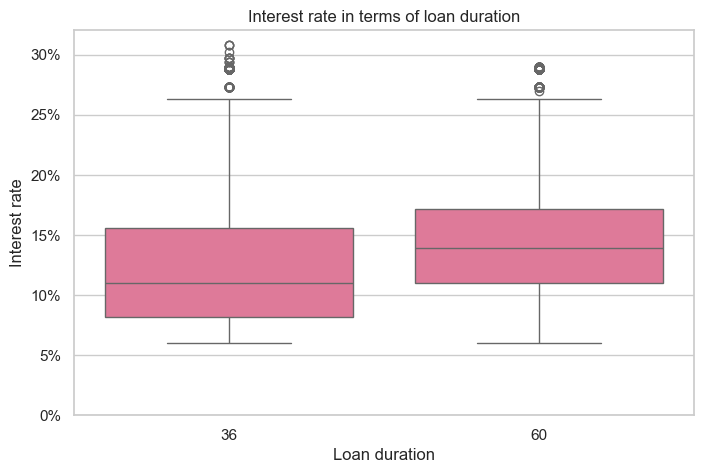

In [454]:
df_cleaned = pd.read_csv('cleaned_new_data.csv')
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned['term'], y=[i*100 for i in df_cleaned['int_rate']], color='#EE6A93')
plt.title("Interest rate in terms of loan duration")
yticks = np.arange(0, 35, 5)
plt.yticks(ticks=yticks, labels=[f'{y}%' for y in yticks])
plt.xlabel("Loan duration")
plt.ylabel("Interest rate")
plt.show()

### 2.2. Distribution of ones and zeros in loan status

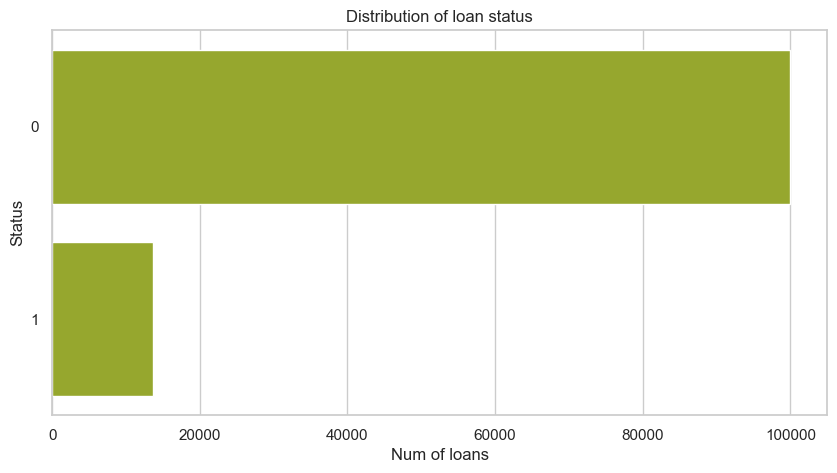

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y=df_cleaned['loan_status_dummy'], order=df_cleaned['loan_status_dummy'].value_counts().index, color='#A4BB1A')
plt.title("Distribution of loan status")
plt.xlabel("Num of loans")
plt.ylabel("Status")
plt.show()

### 2.3. Type of home ownership vs loan status

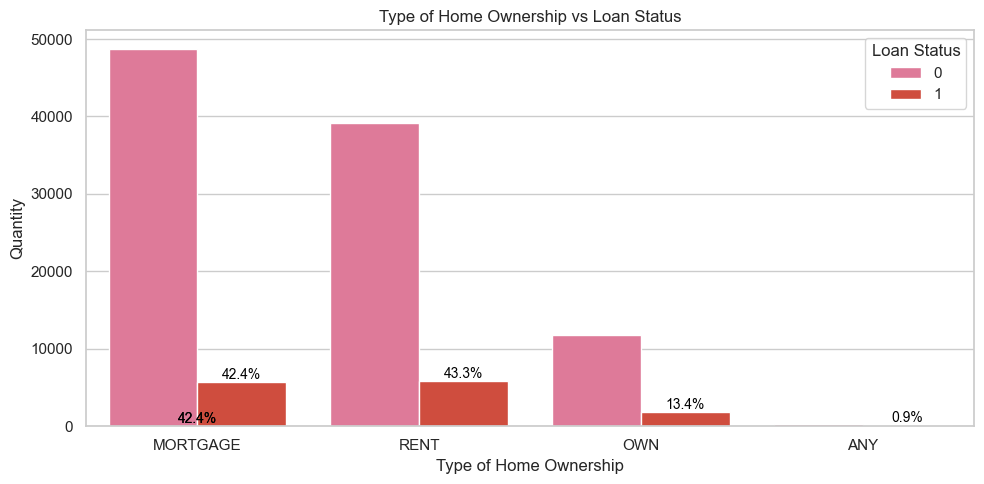

In [470]:
custom_palette = {
    0: "#EE6A93",
    1: "#E73A26"
}

total_ones = len(df_cleaned[df_cleaned['loan_status_dummy'] == 1])
ones_per_category = df_cleaned[df_cleaned['loan_status_dummy'] == 1]['home_ownership'].value_counts()
percent_labels = (ones_per_category / total_ones * 100).round(1).astype(str) + '%'
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='home_ownership', hue='loan_status_dummy', data=df_cleaned, palette=custom_palette)
num_categories = df_cleaned['home_ownership'].nunique()
bars = ax.patches[num_categories:]

for bar in bars:
    category = bar.get_x() + bar.get_width() / 2
    label = bar.get_label()
    height = bar.get_height()
    home_type = bar.get_x() + bar.get_width() / 2
    category_name = bar.get_x()
    home_type_idx = int((bar.get_x() + bar.get_width() / 2) // 1)
    home_type_label = ax.get_xticklabels()[home_type_idx].get_text()
    percent = percent_labels.get(home_type_label, "")
    
    ax.text(bar.get_x() + bar.get_width() / 2, height + 5, percent,
            ha='center', va='bottom', fontsize=10, color='black')

plt.title("Type of Home Ownership vs Loan Status")
plt.xlabel("Type of Home Ownership")
plt.ylabel("Quantity")
plt.legend(title="Loan Status")
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()


In [457]:
result = df_cleaned.groupby('home_ownership')['loan_status_dummy'].value_counts().unstack(fill_value=0)
result['percent_1'] = round(100 * result[1] / (result[0] + result[1]), 1)
result = result.sort_values(by='percent_1', ascending=False)
print(result)

loan_status_dummy      0     1  percent_1
home_ownership                           
ANY                  348   122       26.0
OWN                11827  1830       13.4
RENT               39146  5901       13.1
MORTGAGE           48679  5770       10.6


### 2.4. Type of purpose vs loan status

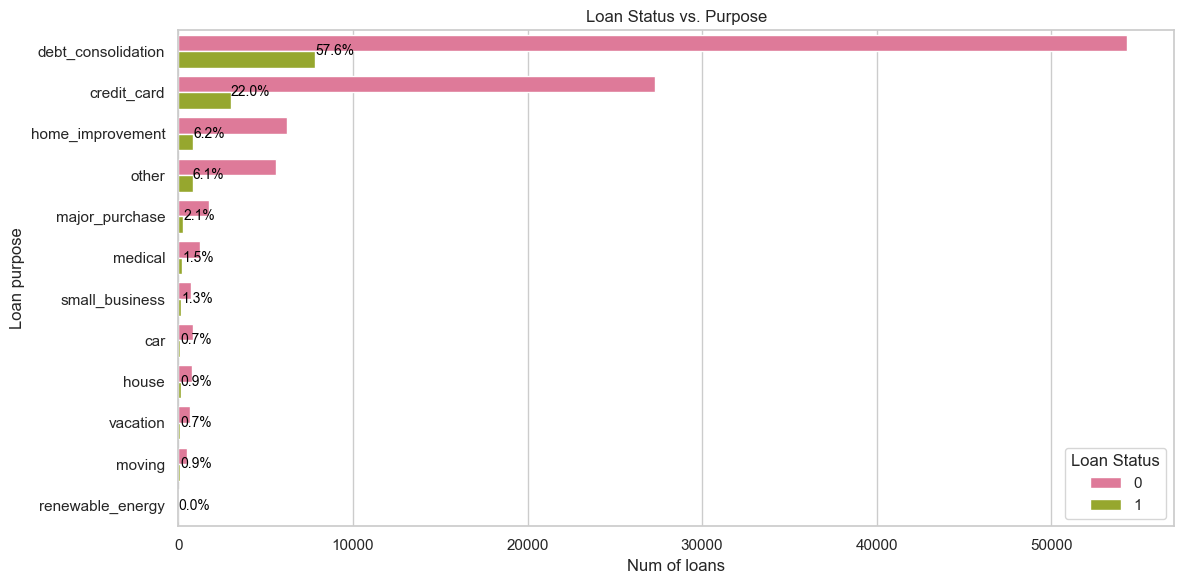

In [458]:
custom_palette = {
    0: "#EE6A93",
    1: "#A4BB1A"
}
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    y=df_cleaned['purpose'],
    hue=df_cleaned['loan_status_dummy'],
    palette=custom_palette,
    order=df_cleaned['purpose'].value_counts().index
)

ones_total = df_cleaned[df_cleaned['loan_status_dummy'] == 1].shape[0]
percent_ones_by_purpose = (
    df_cleaned[df_cleaned['loan_status_dummy'] == 1]['purpose']
    .value_counts(normalize=True) * 100
)

for i, purpose in enumerate(df_cleaned['purpose'].value_counts().index):
    percent = percent_ones_by_purpose.get(purpose, 0)
    ax.text(
        x=ax.containers[1][i].get_width() + 2,
        y=i,
        s=f"{percent:.1f}%",
        va='center',
        color='black',
        fontsize=10
    )

plt.title("Loan Status vs. Purpose")
plt.xlabel("Num of loans")
plt.ylabel("Loan purpose")
plt.legend(title="Loan Status")
plt.tight_layout()
plt.show()


In [459]:
result_purpose = df_cleaned.groupby('purpose')['loan_status_dummy'].value_counts().unstack(fill_value=0)
result_purpose['percent_1'] = round(100 * result_purpose[1] / (result_purpose[0] + result_purpose[1]), 1)
result_purpose = result_purpose.sort_values(by='percent_1', ascending=False)
print(result_purpose)

loan_status_dummy       0     1  percent_1
purpose                                   
small_business        744   179       19.4
moving                519   116       18.3
medical              1241   204       14.1
major_purchase       1760   284       13.9
house                 775   124       13.8
vacation              646   100       13.4
other                5595   825       12.9
debt_consolidation  54318  7847       12.6
home_improvement     6248   841       11.9
car                   818    99       10.8
credit_card         27280  2999        9.9
renewable_energy       56     5        8.2


### 2.5. Employment length vs loan status

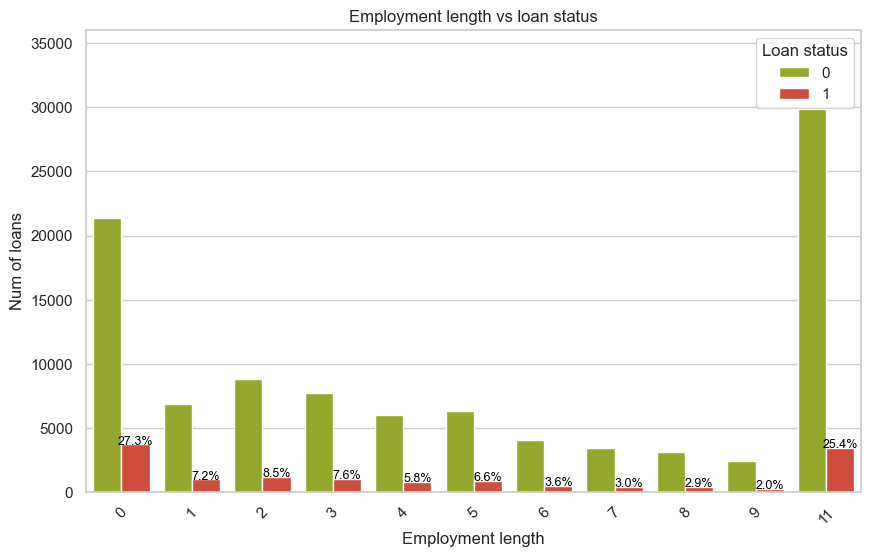

In [460]:
custom_palette = {
    0: "#A4BB1A",
    1: "#E73A26"
}
emp_length_order = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11]
df_ones = df_cleaned[df_cleaned['loan_status_dummy'] == 1]
total_ones = len(df_ones)
ones_per_category = df_ones['emp_length'].value_counts().reindex(emp_length_order, fill_value=0)
percent_labels = (ones_per_category / total_ones * 100).round(1)

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df_cleaned,
    x='emp_length',
    hue='loan_status_dummy',
    order=emp_length_order,
    palette=custom_palette
)
num_categories = len(emp_length_order)
bars = ax.patches[num_categories:]

for bar, emp_len in zip(bars, emp_length_order):
    height = bar.get_height()
    percent = percent_labels.get(emp_len, 0)
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 3,
        f'{percent}%',
        ha='center',
        fontsize=9,
        color='black'
    )

plt.title('Employment length vs loan status')
plt.xlabel('Employment length')
plt.ylabel('Num of loans')
plt.xticks(rotation=45)
plt.legend(title="Loan status")
plt.ylim(top=ax.get_ylim()[1] * 1.15)
plt.show()


In [471]:
result_purpose = df_cleaned.groupby('emp_length')['loan_status_dummy'].value_counts().unstack(fill_value=0)
result_purpose['percent_1'] = round(100 * result_purpose[1] / (result_purpose[0] + result_purpose[1]), 1)
result_purpose = result_purpose.sort_values(by='percent_1', ascending=False)
print(result_purpose)

loan_status_dummy      0     1  percent_1
emp_length                               
0                  21392  3718       14.8
1                   6885   985       12.5
5                   6292   897       12.5
3                   7730  1030       11.8
2                   8797  1162       11.7
4                   6031   792       11.6
8                   3109   401       11.4
6                   4071   493       10.8
7                   3465   415       10.7
11                 29828  3464       10.4
9                   2400   266       10.0


### 2.6.Employment title vs loan status

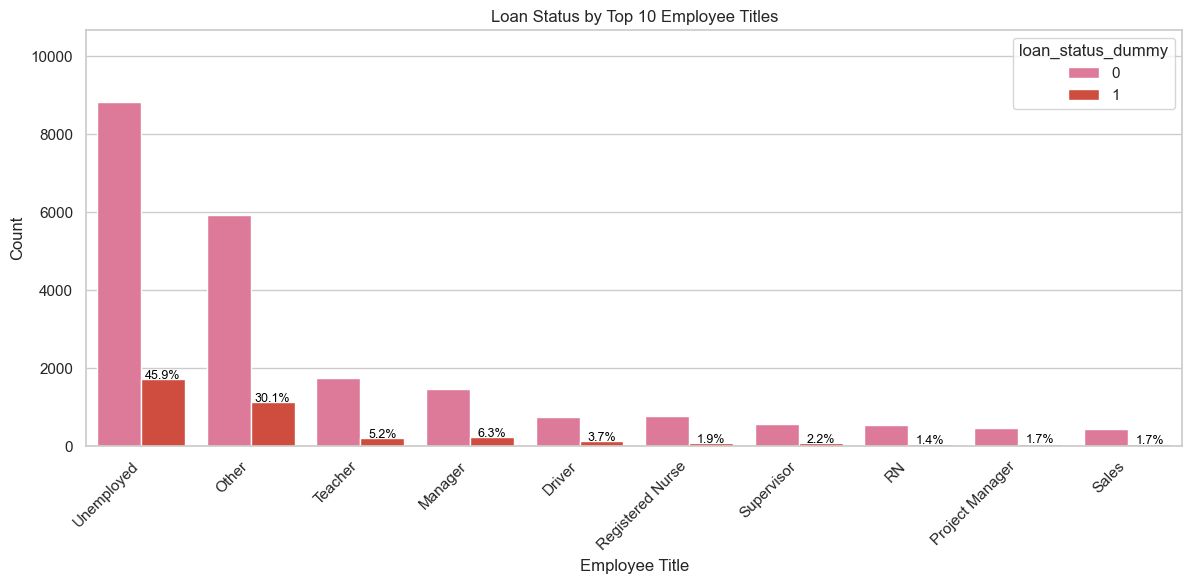

In [461]:
custom_palette = {
    0: "#EE6A93",
    1: "#E73A26"
}

top_titles = df_cleaned['emp_title'].value_counts().nlargest(10).index
df_top = df_cleaned[df_cleaned['emp_title'].isin(top_titles)]
df_ones = df_top[df_top['loan_status_dummy'] == 1]
total_ones = len(df_ones)
ones_per_title = df_ones['emp_title'].value_counts().reindex(top_titles, fill_value=0)
percent_labels = (ones_per_title / total_ones * 100).round(1)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=df_top,
    x='emp_title',
    hue='loan_status_dummy',
    order=top_titles,
    palette=custom_palette
)
num_categories = len(top_titles)
bars = ax.patches[num_categories:]
for bar, title in zip(bars, top_titles):
    height = bar.get_height()
    percent = percent_labels.get(title, 0)
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 3,
        f'{percent}%',
        ha='center',
        fontsize=9,
        color='black'
    )

plt.xticks(rotation=45, ha='right')
plt.xlabel('Employee Title')
plt.ylabel('Count')
plt.title('Loan Status by Top 10 Employee Titles')
plt.tight_layout()
plt.ylim(top=ax.get_ylim()[1] * 1.15)
plt.show()


In [462]:
column = 'emp_title'
top_n = 10
top_values = df_cleaned[column].value_counts().nlargest(top_n).index
df_top = df_cleaned[df_cleaned[column].isin(top_values)]
result = df_top.groupby(column)['loan_status_dummy'].value_counts().unstack(fill_value=0)
result['percent_1'] = round(100 * result.get(1, 0) / (result.get(0, 0) + result.get(1, 0)), 1)
result = result.sort_values(by='percent_1', ascending=False)
print(result)

loan_status_dummy     0     1  percent_1
emp_title                               
Unemployed         8836  1717       16.3
Other              5927  1128       16.0
Driver              756   139       15.5
Manager            1465   234       13.8
Supervisor          564    82       12.7
Project Manager     454    64       12.4
Sales               442    62       12.3
Teacher            1754   194       10.0
RN                  529    52        9.0
Registered Nurse    763    70        8.4


### 2.7 Region vs loan status

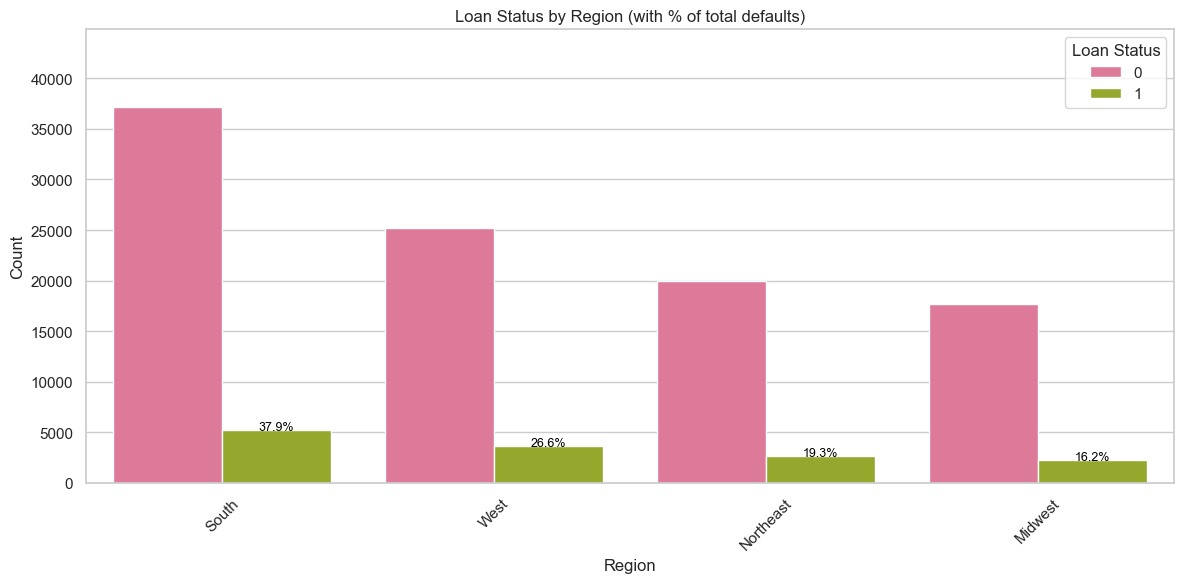

In [463]:
custom_palette = {
    0: "#EE6A93",
    1: "#A4BB1A"
}

top_states = df_cleaned['region'].value_counts().nlargest(10).index
df_top = df_cleaned[df_cleaned['region'].isin(top_states)]
df_ones = df_top[df_top['loan_status_dummy'] == 1]
total_ones = len(df_ones)
ones_per_region = df_ones['region'].value_counts().reindex(top_states, fill_value=0)
percent_labels = (ones_per_region / total_ones * 100).round(1)
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=df_top,
    x='region',
    hue='loan_status_dummy',
    order=top_states,
    palette=custom_palette
)

num_categories = len(top_states)
bars = ax.patches[num_categories:]
for bar, region in zip(bars, top_states):
    height = bar.get_height()
    percent = percent_labels.get(region, 0)
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 3,
        f'{percent}%',
        ha='center',
        fontsize=9,
        color='black'
    )

plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Loan Status by Region (with % of total defaults)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(top=ax.get_ylim()[1] * 1.15)
plt.legend(title='Loan Status')
plt.show()


In [ ]:
column = 'region'
top_n = 10
grouped = df_cleaned.groupby(column)['loan_status_dummy'].value_counts().unstack(fill_value=0)
grouped['percent_1'] = round(100 * grouped.get(1, 0) / (grouped.get(0, 0) + grouped.get(1, 0)), 1)
result = grouped.sort_values(by='percent_1', ascending=False)
print(result)

loan_status_dummy      0     1  percent_1
region                                   
West               25226  3627       12.6
South              37147  5161       12.2
Northeast          19927  2628       11.7
Midwest            17700  2207       11.1


### 2.8 Interest rate vs loan status

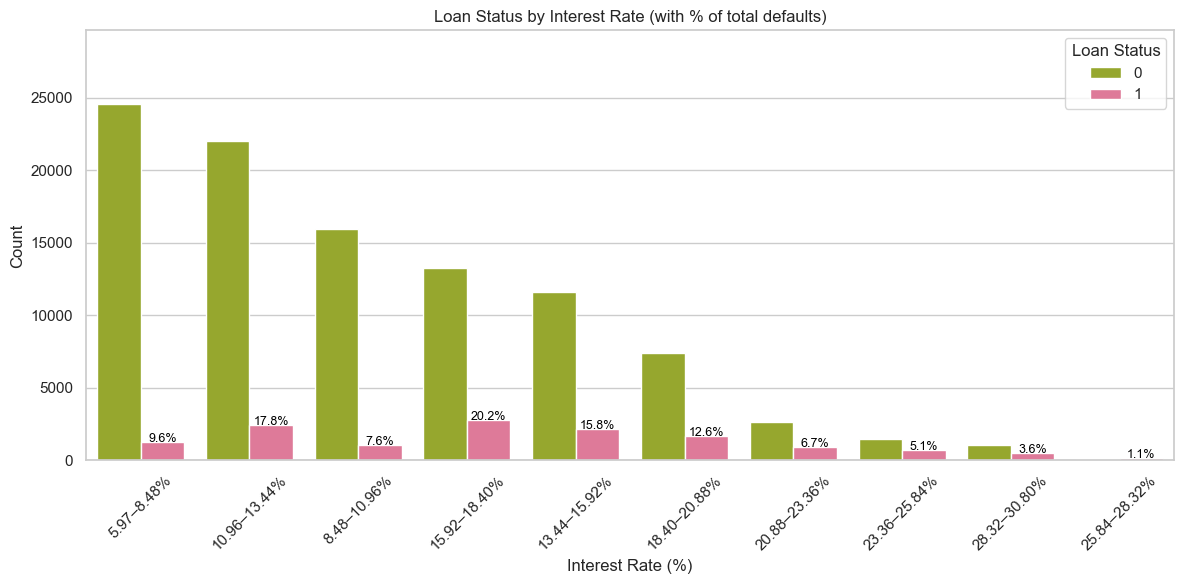

In [465]:
custom_palette = {
    0: "#A4BB1A",
    1: "#EE6A93"
}
df_cleaned['int_rate_pct'] = df_cleaned['int_rate'] * 100
bins = pd.cut(df_cleaned['int_rate_pct'], bins=10)
labels = [
    f"{interval.left:.2f}–{interval.right:.2f}%" for interval in bins.cat.categories
]
bin_mapping = dict(zip(bins.cat.categories, labels))
df_cleaned['int_rate_bin'] = bins.map(bin_mapping)

top_bins = df_cleaned['int_rate_bin'].value_counts().nlargest(10).index
df_top = df_cleaned[df_cleaned['int_rate_bin'].isin(top_bins)]

df_ones = df_top[df_top['loan_status_dummy'] == 1]
total_ones = len(df_ones)
ones_per_bin = df_ones['int_rate_bin'].value_counts().reindex(top_bins, fill_value=0)
percent_labels = (ones_per_bin / total_ones * 100).round(1)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=df_top,
    x='int_rate_bin',
    hue='loan_status_dummy',
    order=top_bins,
    palette=custom_palette
)
num_categories = len(top_bins)
bars = ax.patches[num_categories:]
for bar, bin_label in zip(bars, top_bins):
    height = bar.get_height()
    percent = percent_labels.get(bin_label, 0)
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 3,
        f'{percent}%',
        ha='center',
        fontsize=9,
        color='black'
    )

plt.xlabel('Interest Rate (%)')
plt.ylabel('Count')
plt.title('Loan Status by Interest Rate (with % of total defaults)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(top=ax.get_ylim()[1] * 1.15)
plt.legend(title='Loan Status')
plt.show()


In [466]:
column = 'int_rate'
top_n = 10
df_cleaned['int_rate_pct'] = df_cleaned['int_rate'] * 100
df_cleaned['int_rate_bin'] = pd.cut(df_cleaned['int_rate_pct'], bins=10)
grouped = df_cleaned.groupby('int_rate_bin')['loan_status_dummy'].value_counts().unstack(fill_value=0)
grouped['percent_1'] = round(100 * grouped.get(1, 0) / (grouped.get(0, 0) + grouped.get(1, 0)), 1)
result = grouped.sort_values(by='percent_1', ascending=False)
print(result.head(top_n))

loan_status_dummy      0     1  percent_1
int_rate_bin                             
(25.84, 28.32]       114   144       55.8
(23.36, 25.84]      1459   690       32.1
(28.32, 30.8]       1085   489       31.1
(20.88, 23.36]      2639   910       25.6
(18.4, 20.88]       7414  1710       18.7
(15.92, 18.4]      13239  2757       17.2
(13.44, 15.92]     11580  2155       15.7
(10.96, 13.44]     21978  2425        9.9
(8.48, 10.96]      15961  1042        6.1
(5.975, 8.48]      24531  1301        5.0


/var/folders/25/qdj6v0q16nj947n0zplvjg5r0000gp/T/ipykernel_10645/2870922.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_cleaned.groupby('int_rate_bin')['loan_status_dummy'].value_counts().unstack(fill_value=0)


# 3. Logit regression.

In [467]:
df_cleaned = pd.read_csv('cleaned_new_data.csv')
suitable_columns = []

for col in df_cleaned.columns:
    if pd.api.types.is_numeric_dtype(df_cleaned[col]):
        unique_vals = df_cleaned[col].dropna().unique()
        if len(unique_vals) <= 2 and set(unique_vals).issubset({0, 1}):
            suitable_columns.append(col)
        elif df_cleaned[col].nunique() > 2:
            suitable_columns.append(col)
print("Columns suitable for logistic regression:")
print(suitable_columns)

Columns suitable for logistic regression:
['Unnamed: 0', 'id', 'funded_amnt', 'int_rate', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'open_acc', 'pub_rec', 'revol_bal', 'last_fico_range_low', 'tot_cur_bal', 'mort_acc', 'num_actv_bc_tl', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'total_il_high_credit_limit', 'loan_status_dummy', 'Midwest', 'Northeast', 'South', 'dept_consolidation', 'Mortgage', 'Own', 'Rent']


In [468]:

X = df_cleaned[['funded_amnt', 'int_rate', 'emp_length',
              'annual_inc', 'dti', 'delinq_2yrs', 'open_acc',
              'pub_rec', 'revol_bal', 'last_fico_range_low',
              'tot_cur_bal', 'mort_acc', 'num_actv_bc_tl',
              'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'total_il_high_credit_limit',
              'Midwest', 'Northeast', 'South', 'dept_consolidation',
              'Mortgage', 'Own', 'Rent']]


X = sm.add_constant(X)
y = df_cleaned['loan_status_dummy']
logit_model = sm.Logit(y, X)
logit_model = logit_model.fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.151681
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:      loan_status_dummy   No. Observations:               113623
Model:                          Logit   Df Residuals:                   113599
Method:                           MLE   Df Model:                           23
Date:                Mon, 05 May 2025   Pseudo R-squ.:                  0.5864
Time:                        17:13:48   Log-Likelihood:                -17234.
converged:                       True   LL-Null:                       -41668.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         20.7302      0.312     66.357      0.000      

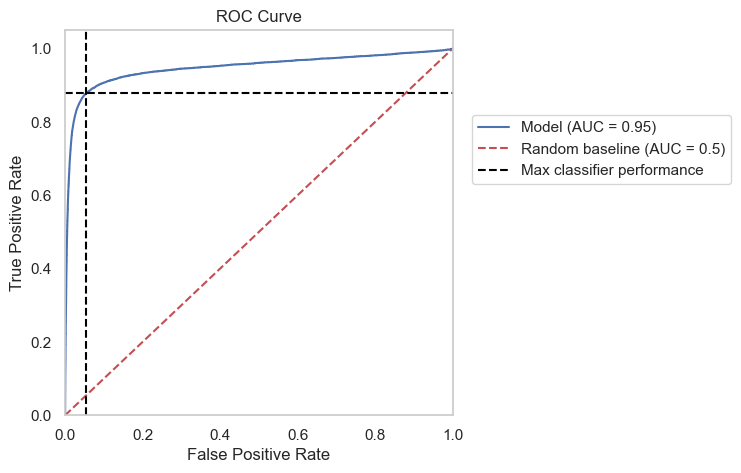

In [469]:
def plot_roc_curve(y_true, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    auc = round(roc_auc_score(y_true=y_true, y_score=y_pred_prob), 2)

    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label=f'Model (AUC = {auc})')
    plt.plot([0, 1], [0, 1], 'r--', label='Random baseline (AUC = 0.5)')

    id_x = pd.Series(abs(tpr - fpr), index=fpr).idxmax()
    plt.axvline(x=id_x, linestyle='dashed', color='black', label='Max classifier performance')
    id_y = pd.Series(abs(tpr - fpr), index=tpr).idxmax()
    plt.axhline(y=id_y, linestyle='dashed', color='black')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc=(1.05, 0.6))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.grid()
    plt.show()

y_pred_prob = logit_model.predict(sm.add_constant(X)) 
y_true = df['loan_status_dummy']
plot_roc_curve(y_true, y_pred_prob)